In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date
import calendar
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1


In [4]:
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
12975,2012-06-29 20:00:00,3,0,1,1,37.72,44.695,42.0,16.9979,53,255,308
12976,2012-06-29 21:00:00,3,0,1,2,35.26,41.665,53.0,12.9980,41,195,236
12977,2012-06-29 22:00:00,3,0,1,3,33.62,41.665,63.0,12.9980,34,129,163
12978,2012-06-29 23:00:00,3,0,1,3,33.62,41.665,63.0,12.9980,6,42,48
12979,2012-06-30 0:00:00,3,0,0,3,26.24,28.790,89.0,11.0014,4,65,69


In [5]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,2012-06-30 1:00:00,3,0,0,3,26.24,28.790,89.0,15.0013,3,55
1,2012-06-30 2:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,7,54
2,2012-06-30 3:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,3,20
3,2012-06-30 4:00:00,3,0,0,2,25.42,27.275,94.0,0.0000,3,15
4,2012-06-30 5:00:00,3,0,0,1,26.24,28.790,89.0,11.0014,3,7


In [6]:
train.shape,test.shape

((12980, 12), (4399, 11))

In [7]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [8]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered'],
      dtype='object')

In [9]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [10]:
test.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
dtype: object

In [11]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000,12980.000000
mean,2.211479,0.027504,0.685978,1.426656,19.725422,23.112436,62.358552,13.141760,32.441757,135.136055,167.577812
std,1.053046,0.163553,0.464143,0.647955,7.828902,8.552046,19.963696,8.325987,46.636228,131.921431,160.758887
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,1.000000,13.120000,15.910000,47.000000,7.001500,3.000000,30.000000,35.000000
50%,2.000000,0.000000,1.000000,1.000000,19.680000,23.485000,62.000000,12.998000,14.000000,103.000000,124.000000
75%,3.000000,0.000000,1.000000,2.000000,26.240000,30.305000,79.000000,19.001200,42.000000,194.000000,245.000000
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,56.996900,367.000000,796.000000,957.000000


In [12]:
test.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
count,4399.000000,4399.000000,4399.000000,4399.000000,4399.000000,4399.000000,4399.000000,4399.000000,4399.000000,4399.000000
mean,3.357809,0.032507,0.673108,1.421232,22.297513,25.784351,63.797909,11.540867,45.220050,208.819277
std,0.766335,0.177363,0.469131,0.613338,7.775455,8.400126,17.118806,7.680410,55.364112,187.367255
min,1.000000,0.000000,0.000000,1.000000,5.740000,7.575000,16.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,1.000000,14.760000,18.180000,50.000000,7.001500,6.000000,49.000000
50%,3.000000,0.000000,1.000000,1.000000,22.960000,26.515000,65.000000,11.001400,25.000000,171.000000
75%,4.000000,0.000000,1.000000,2.000000,28.700000,32.575000,78.000000,16.997900,67.000000,303.000000
max,4.000000,1.000000,1.000000,3.000000,41.000000,45.455000,100.000000,43.998900,362.000000,886.000000


array([[<AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>],
       [<AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'casual'}>],
       [<AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>, <AxesSubplot:>]],
      dtype=object)

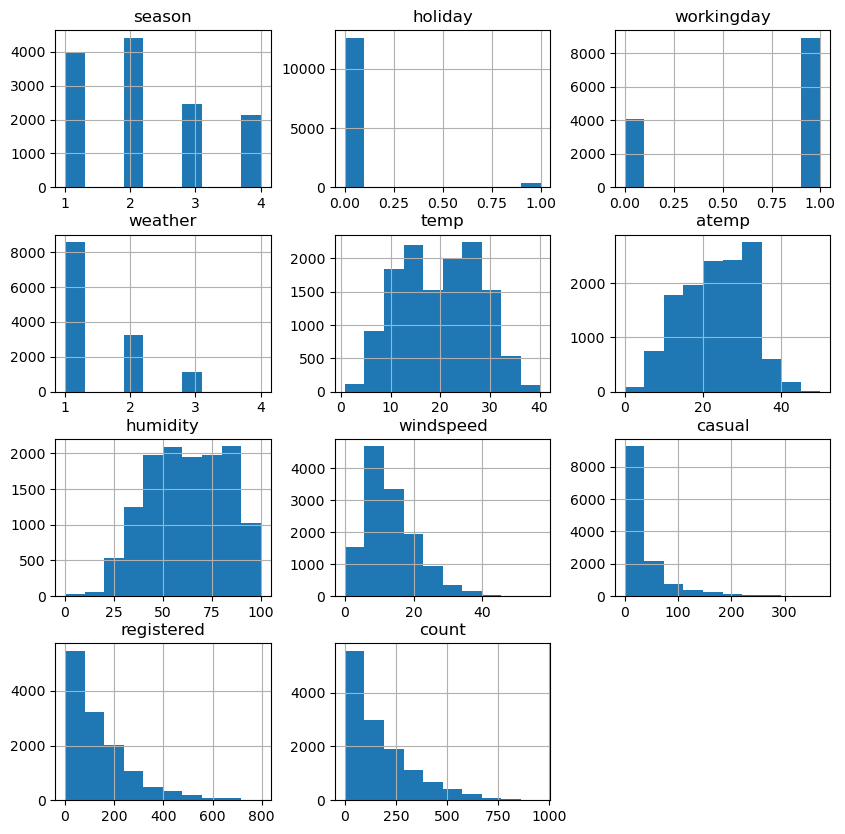

In [13]:
pd.DataFrame.hist(train,figsize=(10,10))

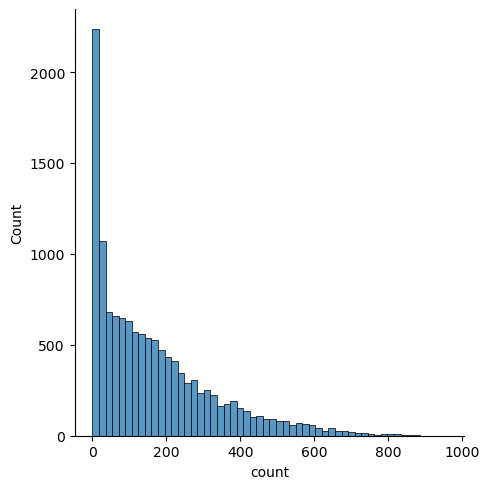

In [14]:
sn.displot(train["count"])

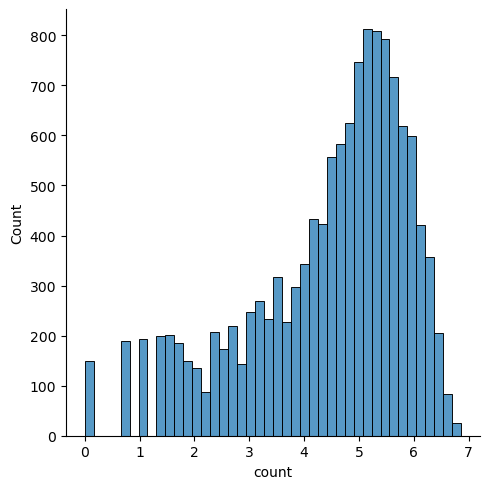

In [15]:
sn.displot(np.log(train["count"]))

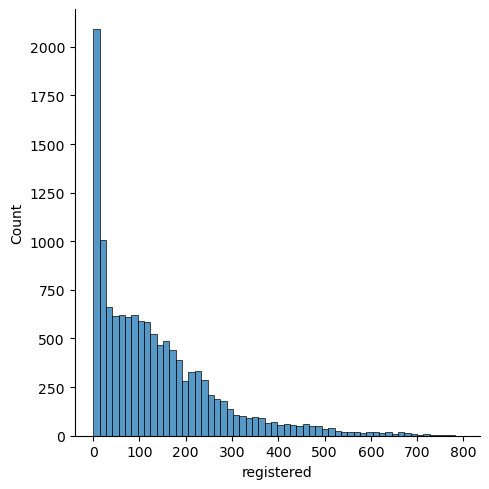

In [16]:
sn.displot(train["registered"])

<AxesSubplot:>

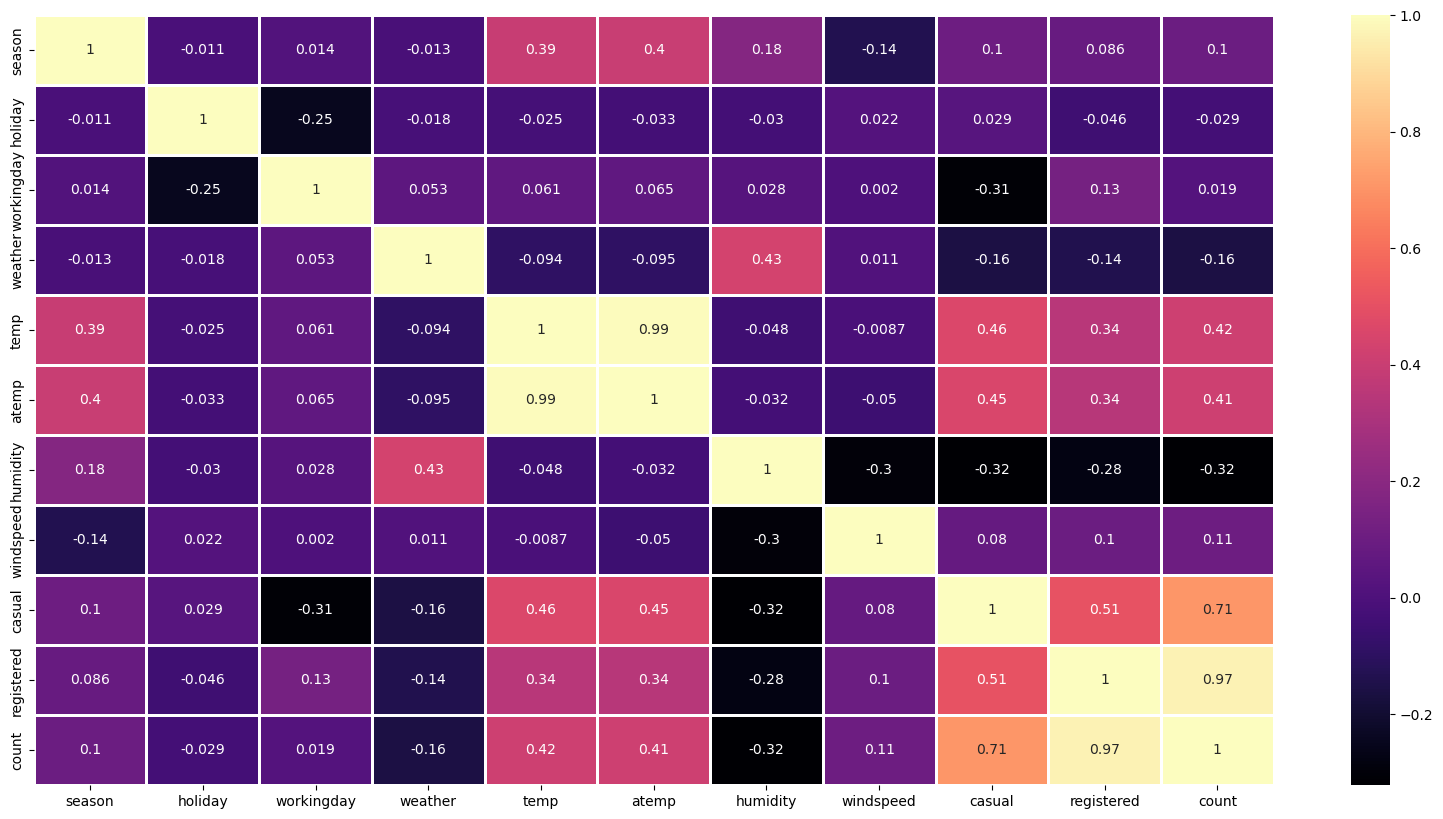

In [17]:
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(train.corr(),annot=True,linewidths=1,cmap="magma")

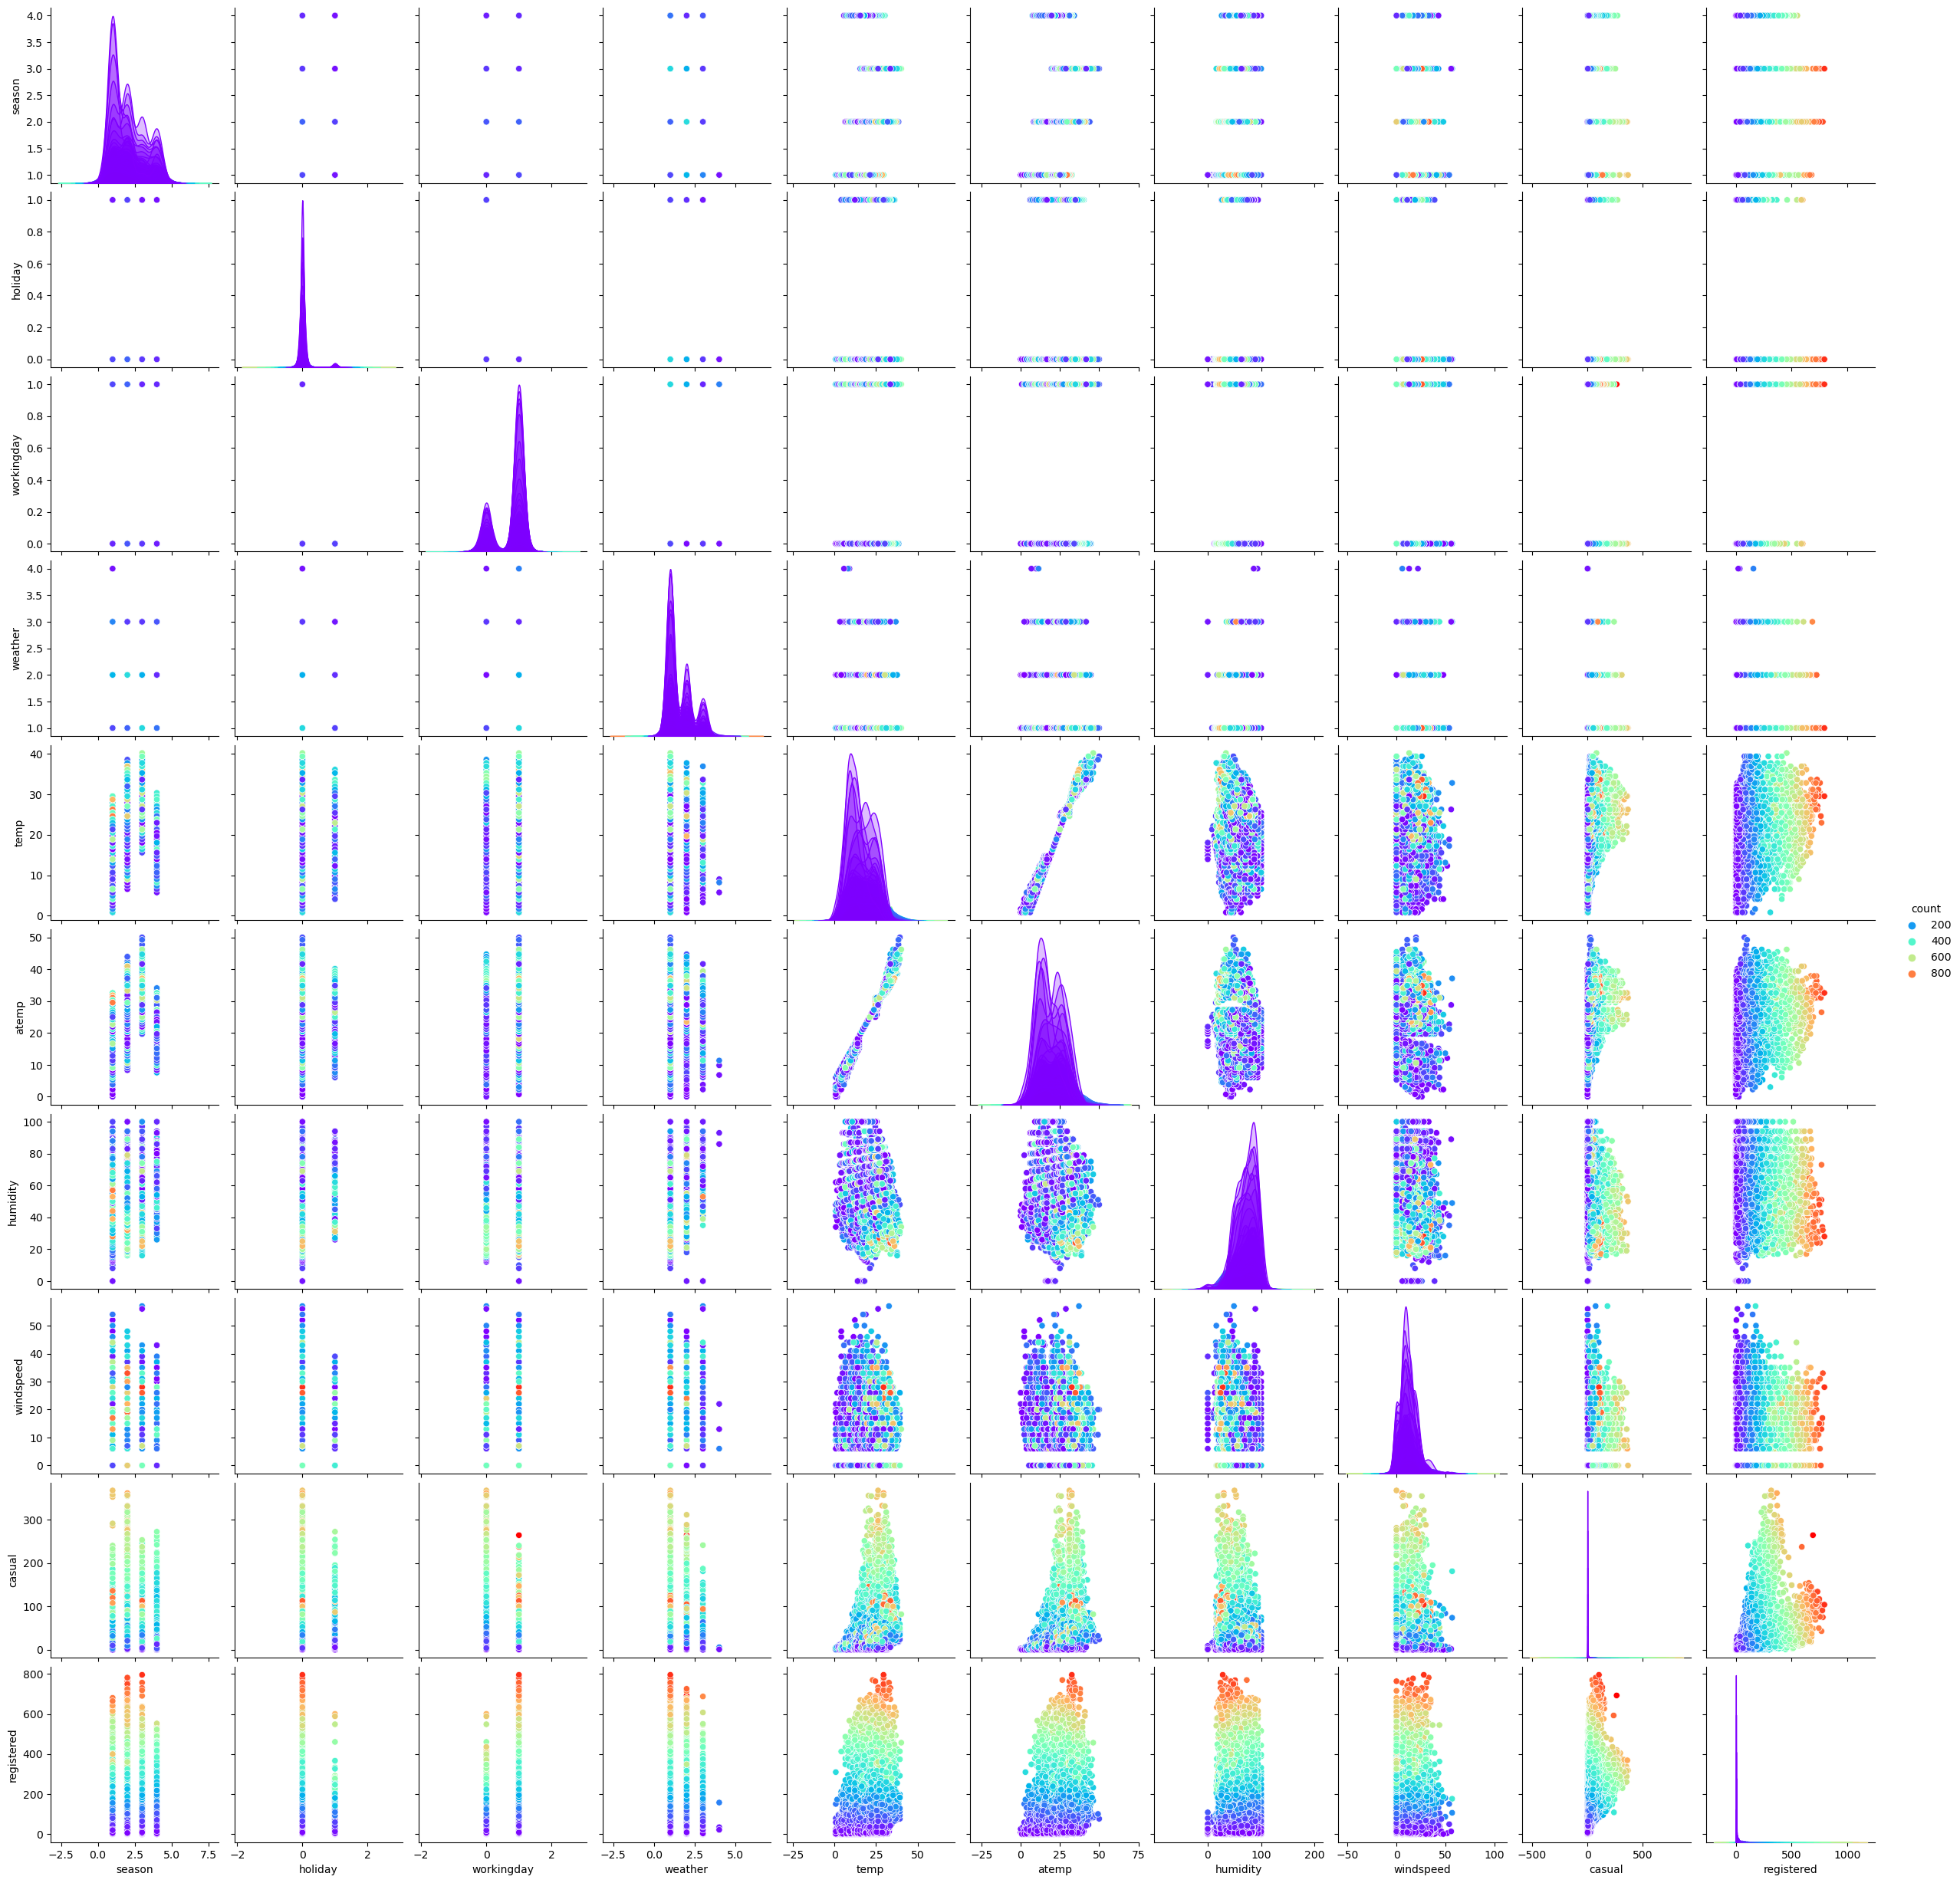

In [18]:
sn.pairplot(train,hue="count",palette="rainbow")

In [19]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [20]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
dtype: int64

In [21]:
train["date"] = train.datetime.apply(lambda x : x.split()[0])
train["hour"] = train.datetime.apply(lambda x : x.split()[1].split(":")[0])
train["month"] = train.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

In [22]:
test["date"] = test.datetime.apply(lambda x:x.split()[0])
test["hour"]=test.datetime.apply(lambda x:x.split()[1].split(":")[0])
test["month"]=test.date.apply(lambda datestring : datetime.strptime(datestring,"%Y-%m-%d").month)

In [23]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,month
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16,2011-01-01,0,1
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40,2011-01-01,1,1
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32,2011-01-01,2,1
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13,2011-01-01,3,1
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1,2011-01-01,4,1


In [24]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,date,hour,month
0,2012-06-30 1:00:00,3,0,0,3,26.24,28.790,89.0,15.0013,3,55,2012-06-30,1,6
1,2012-06-30 2:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,7,54,2012-06-30,2,6
2,2012-06-30 3:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,3,20,2012-06-30,3,6
3,2012-06-30 4:00:00,3,0,0,2,25.42,27.275,94.0,0.0000,3,15,2012-06-30,4,6
4,2012-06-30 5:00:00,3,0,0,1,26.24,28.790,89.0,11.0014,3,7,2012-06-30,5,6


In [25]:
training = train[train['datetime']<='2012-03-30 0:00:00']
val = train[train['datetime']>'2012-03-30 0:00:00']

In [26]:
training.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,month
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16,2011-01-01,0,1
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40,2011-01-01,1,1
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32,2011-01-01,2,1
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13,2011-01-01,3,1
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1,2011-01-01,4,1


In [27]:
val.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,month
10774,2012-03-30 1:00:00,2,0,1,1,15.58,19.695,50.0,19.0012,6,21,27,2012-03-30,1,3
10775,2012-03-30 2:00:00,2,0,1,1,14.76,16.665,53.0,19.9995,1,6,7,2012-03-30,2,3
10776,2012-03-30 3:00:00,2,0,1,1,13.94,16.665,61.0,8.9981,0,7,7,2012-03-30,3,3
10777,2012-03-30 4:00:00,2,0,1,1,13.94,17.425,53.0,6.0032,1,1,2,2012-03-30,4,3
10778,2012-03-30 5:00:00,2,0,1,1,13.12,16.665,61.0,6.0032,0,26,26,2012-03-30,5,3


In [28]:
test=test.drop(["datetime","atemp","date"],axis=1)
train=train.drop(["datetime","atemp","date"],axis=1)
training=training.drop(["datetime","atemp","date"],axis=1)
val=val.drop(["datetime","atemp","date"],axis=1)

In [29]:
val.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,hour,month
10774,2,0,1,1,15.58,50.0,19.0012,6,21,27,1,3
10775,2,0,1,1,14.76,53.0,19.9995,1,6,7,2,3
10776,2,0,1,1,13.94,61.0,8.9981,0,7,7,3,3
10777,2,0,1,1,13.94,53.0,6.0032,1,1,2,4,3
10778,2,0,1,1,13.12,61.0,6.0032,0,26,26,5,3


In [30]:
X_training=training.drop('count',axis=1)
Y_training=np.log(training['count'])

In [31]:
X_val=val.drop('count',axis=1)
Y_val=np.log(val['count'])

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lreg = LinearRegression()

In [34]:
lreg.fit(X_training,Y_training)

LinearRegression()

In [35]:
prediction=lreg.predict(X_val)

In [36]:
def rmsle(y, y_):
    y = np.exp(y),   
    y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [37]:
rmsle(Y_val,prediction)

0.887537920428178

In [38]:
lreg.score(X_val,Y_val)

0.6079782061541937

In [39]:
from sklearn.tree import DecisionTreeRegressor

In [40]:
d_reg = DecisionTreeRegressor()

In [41]:
d_reg.fit(X_training,Y_training)

DecisionTreeRegressor()

In [42]:
prediction1=d_reg.predict(X_val)

In [43]:
rmsle(Y_val,prediction1)

0.04881370412103069

In [44]:
from sklearn.neighbors import KNeighborsRegressor

In [45]:
k_reg = KNeighborsRegressor()

In [46]:
k_reg.fit(X_training,Y_training)

KNeighborsRegressor()

In [47]:
prediction2=k_reg.predict(X_val)

In [48]:
rmsle(Y_val,prediction2)

0.09052537879337152

In [49]:
test_prediction = d_reg.predict(test)

In [50]:
final_prediction = np.exp(test_prediction)

In [51]:
submission1 = pd.DataFrame()

In [52]:
submission1['count'] = final_prediction

In [53]:
submission1.to_csv('submission1.csv', header=True, index=False)